# L2R Boosting

## EDA

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import ndcg_score

In [3]:
df = pd.read_csv('intern_task.csv')
df.describe()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


In [ ]:
df.shape

(235258, 146)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(235258, 146)

In [ ]:
for i in df.columns:
     print(i, end=', ')

rank, query_id, feature_0, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, feature_13, feature_14, feature_15, feature_16, feature_17, feature_18, feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_27, feature_28, feature_29, feature_30, feature_31, feature_32, feature_33, feature_34, feature_35, feature_36, feature_37, feature_38, feature_39, feature_40, feature_41, feature_42, feature_43, feature_44, feature_45, feature_46, feature_47, feature_48, feature_49, feature_50, feature_51, feature_52, feature_53, feature_54, feature_55, feature_56, feature_57, feature_58, feature_59, feature_60, feature_61, feature_62, feature_63, feature_64, feature_65, feature_66, feature_67, feature_68, feature_69, feature_70, feature_71, feature_72, feature_73, feature_74, feature_75, feature_76, feature_77, feature_78, feature_79, feature_80, feature_81, feature_82

In [ ]:
df['rank'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [ ]:
for col in df.columns:
    if len(df[col].unique()) < 2:
        print(col, df[col].unique())

feature_64 [0]
feature_65 [0]
feature_72 [1]
feature_100 [0]


In [ ]:
for col in df.columns:
    print(col, df[col].unique())

rank [0 1 2 4 3]
query_id [   10    25    40 ... 29965 29980 29995]
feature_0 [ 1.  3.  0.  2.  4.  5.  6.  7.  8.  9. 10. 11. 27. 31. 26. 24.]
feature_1 [ 0.  1.  3.  2.  4.  5.  6.  7. 18.  9.]
feature_2 [ 1.  3.  2.  0.  4.  5.  6.  7. 24. 20. 22. 27.  8. 19.  9.]
feature_3 [3. 0. 1. 2. 4. 6. 5. 7. 9. 8.]
feature_4 [ 3.  0.  2.  1.  4.  5.  6.  7.  8.  9. 10. 11. 27. 31. 26. 24.]
feature_5 [0.333333 1.       0.       0.666667 0.5      0.75     0.25     0.8
 0.4      0.6      0.833333 0.2      0.166667 0.428571 0.714286 0.571429
 0.285714 0.857143 0.142857 0.875    0.625    0.125    0.375    0.153846
 0.307692 0.384615 0.615385 0.545455 0.181818 0.363636 0.454545 0.272727
 0.636364 0.727273 0.090909 0.818182 0.909091 0.84375  0.96875  0.8125
 0.777778 0.555556 0.888889 0.444444]
feature_6 [0.       0.333333 1.       0.5      0.666667 0.25     0.75     0.4
 0.2      0.166667 0.833333 0.6      0.142857 0.375    0.125    0.8
 0.285714 0.428571 0.090909 0.571429 0.21875  0.5625   0.77777

array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'query_id'}>,
        <Axes: title={'center': 'feature_0'}>,
        <Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>,
        <Axes: title={'center': 'feature_3'}>,
        <Axes: title={'center': 'feature_4'}>,
        <Axes: title={'center': 'feature_5'}>,
        <Axes: title={'center': 'feature_6'}>,
        <Axes: title={'center': 'feature_7'}>,
        <Axes: title={'center': 'feature_8'}>,
        <Axes: title={'center': 'feature_9'}>],
       [<Axes: title={'center': 'feature_10'}>,
        <Axes: title={'center': 'feature_11'}>,
        <Axes: title={'center': 'feature_12'}>,
        <Axes: title={'center': 'feature_13'}>,
        <Axes: title={'center': 'feature_14'}>,
        <Axes: title={'center': 'feature_15'}>,
        <Axes: title={'center': 'feature_16'}>,
        <Axes: title={'center': 'feature_17'}>,
        <Axes: title={'center': 'feature_18'}>,
        <

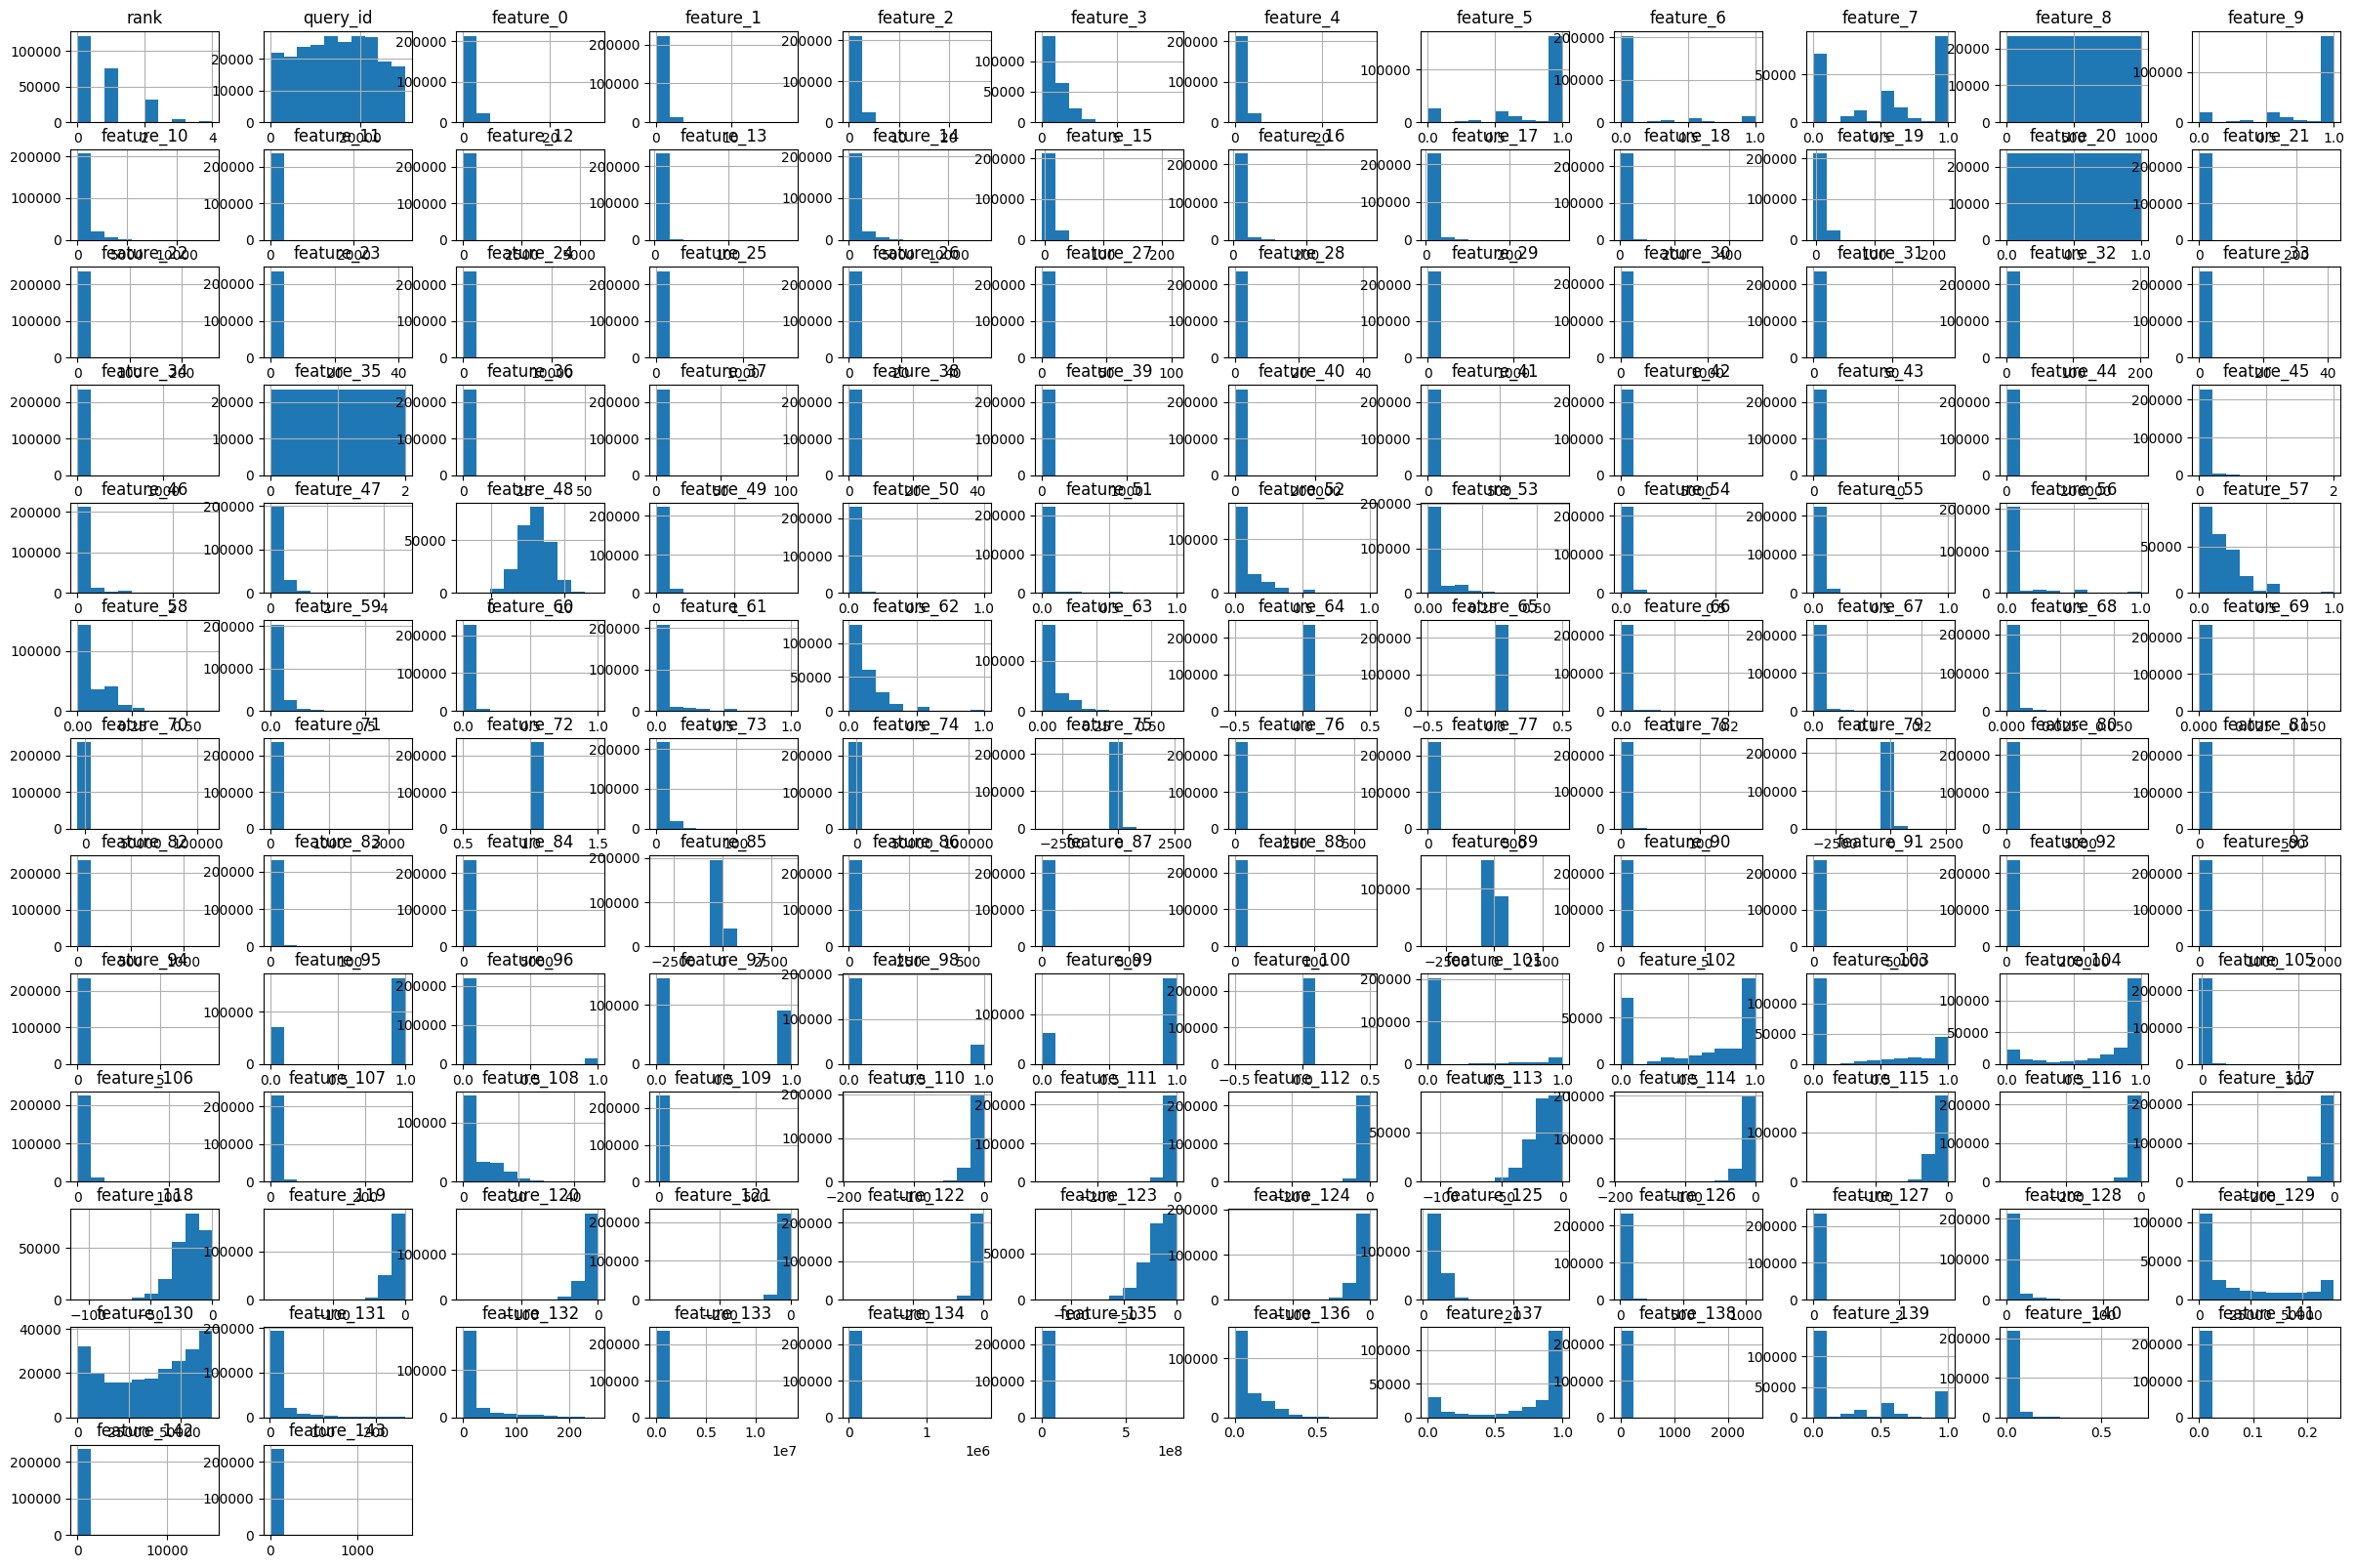

In [ ]:
from matplotlib import pyplot
df.hist(figsize=(30,20))

In [4]:
df.drop(['feature_64', 'feature_65', 'feature_72', 'feature_100'], axis=1, inplace=True)

## Splitting rows by query

In [5]:
from sklearn.model_selection import train_test_split

query_ids = df['query_id'].unique()

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_query_ids, remaining_query_ids = train_test_split(query_ids, train_size=train_ratio, random_state=42)
val_query_ids, test_query_ids = train_test_split(remaining_query_ids, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

train_data = df[df['query_id'].isin(train_query_ids)]
val_data = df[df['query_id'].isin(val_query_ids)]
test_data = df[df['query_id'].isin(test_query_ids)]



In [13]:
train_data

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235253,2,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001350,0.000002,3.0,1.500000
235254,2,29995,1.0,0.0,1.0,0.0,1.0,0.500000,0.0,0.500000,...,0.0,0.000000,0.000000,0.471409,39.908056,0.000000,0.004850,0.000014,9.0,4.500000
235255,1,29995,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.000000,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001064,0.000001,1.0,0.500000
235256,2,29995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [6]:
X_train, y_train, train_q = train_data.drop(['rank', 'query_id'], axis=1), train_data['rank'], train_data['query_id']
X_val, y_val, val_q = val_data.drop(['rank', 'query_id'], axis=1), val_data['rank'], val_data['query_id']
X_test, y_test, test_q = test_data.drop(['rank', 'query_id'], axis=1), test_data['rank'], test_data['query_id']


## XGBoost

In [19]:
import xgboost as xgb

In [20]:
g = train_data.groupby(by=train_q)
size = g.size()
group_train = size.to_list()
print(group_train)
g = val_data.groupby(by=val_q)
size = g.size()
group_valid = size.to_list()

[92, 58, 84, 58, 163, 117, 88, 138, 84, 97, 84, 37, 67, 172, 193, 137, 133, 84, 155, 52, 319, 119, 36, 190, 98, 153, 127, 76, 90, 82, 90, 101, 77, 142, 78, 135, 78, 96, 151, 95, 94, 71, 176, 158, 70, 85, 114, 192, 180, 150, 84, 264, 81, 123, 57, 128, 142, 126, 108, 111, 150, 65, 104, 69, 240, 115, 98, 73, 59, 75, 180, 163, 112, 130, 137, 144, 92, 138, 51, 116, 115, 105, 75, 133, 68, 70, 94, 171, 88, 101, 106, 33, 118, 58, 162, 58, 108, 121, 20, 96, 225, 38, 59, 70, 46, 164, 68, 143, 69, 38, 93, 80, 63, 77, 171, 66, 142, 109, 93, 142, 64, 151, 153, 34, 118, 103, 92, 150, 165, 115, 77, 82, 84, 105, 22, 59, 37, 154, 136, 90, 211, 156, 68, 122, 144, 80, 77, 46, 115, 138, 134, 276, 84, 103, 145, 318, 111, 110, 57, 139, 96, 171, 155, 25, 118, 86, 36, 114, 87, 98, 76, 95, 167, 148, 69, 113, 141, 45, 88, 205, 144, 113, 211, 103, 99, 63, 32, 75, 183, 84, 73, 131, 84, 136, 24, 111, 245, 123, 143, 113, 122, 91, 176, 95, 247, 111, 96, 115, 73, 138, 69, 77, 60, 164, 92, 52, 118, 77, 79, 48, 97, 92,

In [ ]:
ranker = xgb.XGBRanker(
        n_estimators=10000,
        learning_rate=0.1,
        objective='rank:ndcg',
        reg_lambda=0.05,
        verbose = True,
        eval_metric  = 'ndcg@5',
        tree_method = 'hist',
        device = 'cuda'
    )

ranker.fit(
    X_train.astype(float),
    y_train.astype(int),
    group=group_train,
    eval_group=[group_valid],
    eval_set=[(X_val.astype(float), y_val.astype(int))],
    early_stopping_rounds=100,
    verbose = True
)

test_pred = ranker.predict(X_test.astype(float))
y_test_df = pd.DataFrame({"relevance_score": y_test, "predicted_ranking": test_pred})

In [31]:
ndcg_5_test = ndcg_score([y_test], [test_pred], k=5)

print("Test NDCG@5:", ndcg_5_test)

Test NDCG@5: 0.8564897801720595


In [63]:
qids = np.unique(test_data['query_id'])

ndcg_ = []

for i, qid in enumerate(qids):
    y = y_test[test_data['query_id'] == qid]
    if np.sum(y) == 0:
        continue
    
    p = ranker.predict(X_test[test_data['query_id'] == qid])
    ndcg_.append(ndcg_score([y], [p], k=5))

print('NDCG@5 averaged by query:', np.mean(ndcg_))

NDCG@5 averaged by query: 0.5485172110938896


## LightGBM

In [64]:
import lightgbm as lgb
gbm = lgb.LGBMRanker()

In [65]:
g = train_data.groupby(by=train_q)
size = g.size()
query_train = size.to_list()

g = val_data.groupby(by=val_q)
size = g.size()
query_val = size.to_list()

g = test_data.groupby(by=test_q)
size = g.size()
query_test = size.to_list()

In [66]:
gbm.fit(X_train, y_train, group=group_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.395919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26436
[LightGBM] [Info] Number of data points in the train set: 188989, number of used features: 140


LGBMRanker()

In [ ]:
predictions = []

for group in np.unique(test_data['query_id']):
    preds = gbm.predict(X_test[test_data['query_id'] == group])
    predictions.extend(preds)

In [ ]:
print(ndcg_score(y_true=[y_test], y_score=[predictions], k=5))

0.8564897801720595


In [67]:
ndcg_ = []

for i, qid in enumerate(qids):
    y = y_test[test_data['query_id'] == qid]
    if np.sum(y) == 0:
        continue
    
    p = gbm.predict(X_test[test_data['query_id'] == qid])
    ndcg_.append(ndcg_score([y], [p], k=5))

print('NDCG@5 averaged by query:', np.mean(ndcg_))

NDCG@5 averaged by query: 0.5511123277160209


## CatBoost

In [9]:
from catboost import CatBoostRanker, Pool
from copy import deepcopy

In [10]:
queries_train = train_data['query_id'].values
queries_test = test_data['query_id'].values

In [11]:
y_test_for_catboost = y_test / 4
y_train_for_catboost = y_train / 4

In [12]:
train = Pool(
    data=X_train,
    label=y_train_for_catboost,
    group_id=queries_train
)

test = Pool(
    data=X_test,
    label=y_test_for_catboost,
    group_id=queries_test
)

In [13]:
default_parameters = {
    'iterations': 1000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
    'early_stopping_rounds' : 100,
}

parameters = {}

In [14]:
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function

    if additional_params is not None:
        parameters.update(additional_params)

    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)

    return model

In [74]:
model_y = fit_model('YetiRank', {'task_type': 'GPU'})


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AverageGain, PFound, NDCG is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric AverageGain:top=10 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


In [15]:
qids = np.unique(test_data['query_id'])

In [76]:
ndcg_ = []

for i, qid in enumerate(qids):
    y = y_test[test_data['query_id'] == qid]
    if np.sum(y) == 0:
        continue
    
    p = model_y.predict(X_test[test_data['query_id'] == qid])
    ndcg_.append(ndcg_score([y], [p], k=5))

print('NDCG@5 averaged by query:', np.mean(ndcg_))

NDCG@5 averaged by query: 0.5556065317826057


## Optuna trial on CatBoost

In [16]:
from catboost import CatBoostRanker
import optuna


In [79]:
def objective(trial):
    params = {
        'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
        'random_seed': 0,
        'metric_period' : 10,
        'early_stopping_rounds' : 100,
        'loss_function' : 'YetiRank',
        'train_dir': 'YetiRank',
        'task_type' : 'GPU',
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'depth': trial.suggest_int('depth', 6, 8),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1),
    }

    model = CatBoostRanker(**params)
    model.fit(train, eval_set=test)

    y_pred = model.predict(X_test)
    ndcg = ndcg_score(y_test.to_numpy().reshape(1, -1), y_pred.reshape(1, -1), k=5)

    return -ndcg


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=40)

In [ ]:
best_params = study.best_trial.params
print(best_params)

{'iterations': 1206, 'depth': 7, 'learning_rate': 0.025836766688015447}


In [17]:
best_params = {'iterations': 1206, 'depth': 7, 'learning_rate': 0.025836766688015447}
best_model = CatBoostRanker(**best_params, verbose=True, task_type='GPU')
best_model.fit(train, eval_set=test)
print(train)

y_pred = best_model.predict(X_val)
ndcg = ndcg_score(y_val.to_numpy().reshape(1, -1), y_pred.reshape(1, -1), k=5)
print("NDCG@5 Score:", ndcg)

Default metric period is 5 because PFound is/are not implemented for GPU
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.5632342	best: 0.5632342 (0)	total: 89.8ms	remaining: 1m 48s
1:	total: 110ms	remaining: 1m 6s
2:	total: 128ms	remaining: 51.5s
3:	total: 148ms	remaining: 44.5s
4:	total: 168ms	remaining: 40.3s
5:	test: 0.6340837	best: 0.6340837 (5)	total: 191ms	remaining: 38.2s
6:	total: 212ms	remaining: 36.4s
7:	total: 232ms	remaining: 34.8s
8:	total: 251ms	remaining: 33.4s
9:	total: 270ms	remaining: 32.3s
10:	test: 0.6458138	best: 0.6458138 (10)	total: 292ms	remaining: 31.8s
11:	total: 312ms	remaining: 31.1s
12:	total: 334ms	remaining: 30.6s
13:	total: 354ms	remaining: 30.1s
14:	total: 375ms	remaining: 29.8s
15:	test: 0.6486793	best: 0.6486793 (15)	total: 397ms	remaining: 29.6s
16:	total: 417ms	remaining: 29.2s
17:	total: 437ms	remaining: 28.9s
18:	total: 458ms	remaining: 28.6s
19:	total: 479ms	remaining: 28.4s
20:	test: 0.6491592	best: 0.6491592 (20)	total: 501ms	remaining: 28.3s
21:	total: 520ms	remaining: 28s
22:	total: 538ms	remaining: 27.7s
23:	total: 558ms	remaining: 27.5s
24:	total: 

In [18]:
ndcg_ = []

for i, qid in enumerate(qids):
    y = y_test[test_data['query_id'] == qid]
    if np.sum(y) == 0:
        continue
    
    p = best_model.predict(X_test[test_data['query_id'] == qid])
    ndcg_.append(ndcg_score([y], [p], k=5))

print('NDCG@5 averaged by query:', np.mean(ndcg_))

NDCG@5 averaged by query: 0.5576102098593066
